In [2]:
# -----------------------
# Imports
# -----------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# -----------------------
# Chargement des données
# -----------------------
CSV_FILE = "cves_consolidees.csv"
df = pd.read_csv(CSV_FILE)

print("Nombre total de lignes :", len(df))
print("Colonnes :", list(df.columns))

# Nettoyage minimal
df["Score CVSS"] = pd.to_numeric(df["Score CVSS"], errors="coerce")
df["Score EPSS"] = pd.to_numeric(df["Score EPSS"], errors="coerce")


Nombre total de lignes : 116
Colonnes : ['Titre bulletin (ANSSI)', 'Type bulletin', 'Date publication', 'Identifiant CVE', 'Score CVSS', 'Base Severity', 'Type CWE', 'Score EPSS', 'Lien bulletin (ANSSI)', 'Description', 'Éditeur/Vendor', 'Produit', 'Versions affectées']


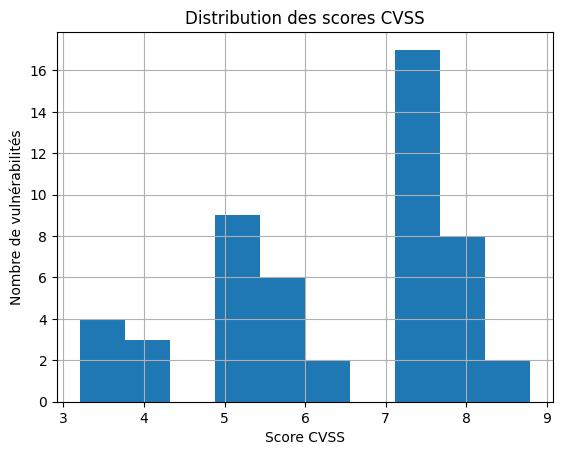

In [4]:
# -----------------------
# 1) Histogramme CVSS
# -----------------------

plt.figure()
df["Score CVSS"].dropna().hist(bins=10)
plt.title("Distribution des scores CVSS")
plt.xlabel("Score CVSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

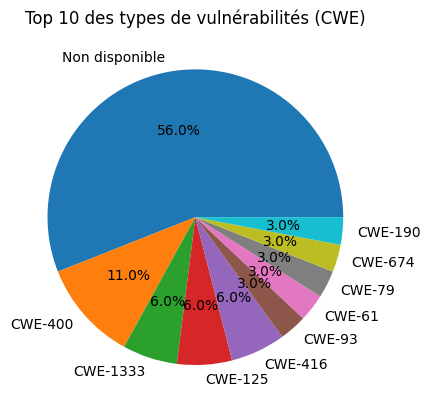

In [5]:
# -----------------------
# 2) Diagramme circulaire des CWE
# -----------------------

plt.figure()
df["Type CWE"].value_counts().head(10).plot.pie(autopct="%1.1f%%")
plt.title("Top 10 des types de vulnérabilités (CWE)")
plt.ylabel("")
plt.show()

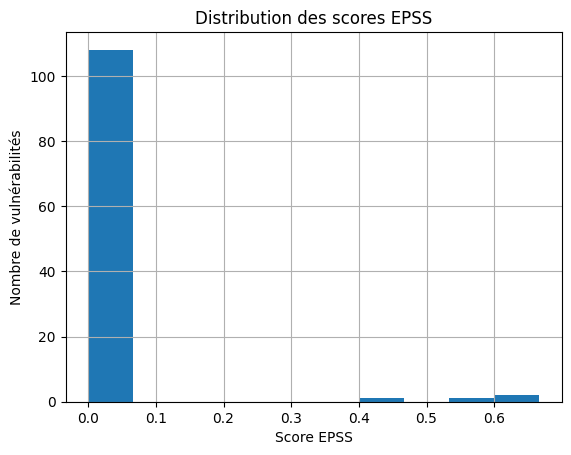

In [6]:
# -----------------------
# 3) Distribution EPSS
# -----------------------

plt.figure()
df["Score EPSS"].dropna().hist(bins=10)
plt.title("Distribution des scores EPSS")
plt.xlabel("Score EPSS")
plt.ylabel("Nombre de vulnérabilités")
plt.show()

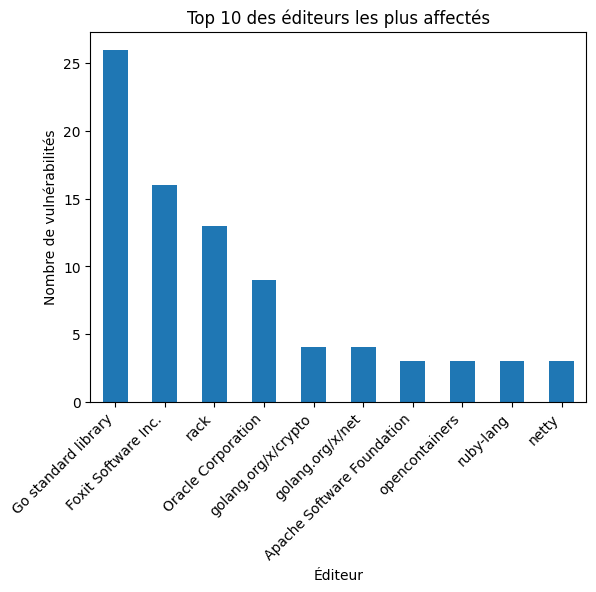

In [7]:
# -----------------------
# 4) Top éditeurs les plus affectés
# -----------------------

top_vendors = df["Éditeur/Vendor"].value_counts().head(10)

plt.figure()
top_vendors.plot.bar()
plt.title("Top 10 des éditeurs les plus affectés")
plt.xlabel("Éditeur")
plt.ylabel("Nombre de vulnérabilités")
plt.xticks(rotation=45, ha="right")
plt.show()

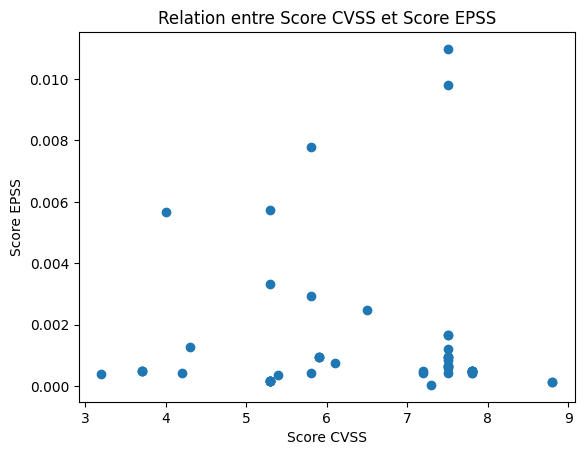

In [8]:
# -----------------------
# 5) Nuage de points CVSS vs EPSS
# -----------------------

plt.figure()
plt.scatter(df["Score CVSS"], df["Score EPSS"])
plt.title("Relation entre Score CVSS et Score EPSS")
plt.xlabel("Score CVSS")
plt.ylabel("Score EPSS")
plt.show()

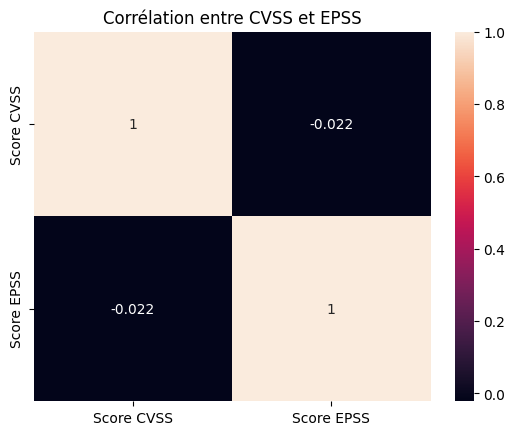

In [9]:
# -----------------------
# 6) Heatmap corrélation CVSS / EPSS
# -----------------------

plt.figure()
corr = df[["Score CVSS", "Score EPSS"]].corr()
sns.heatmap(corr, annot=True)
plt.title("Corrélation entre CVSS et EPSS")
plt.show()

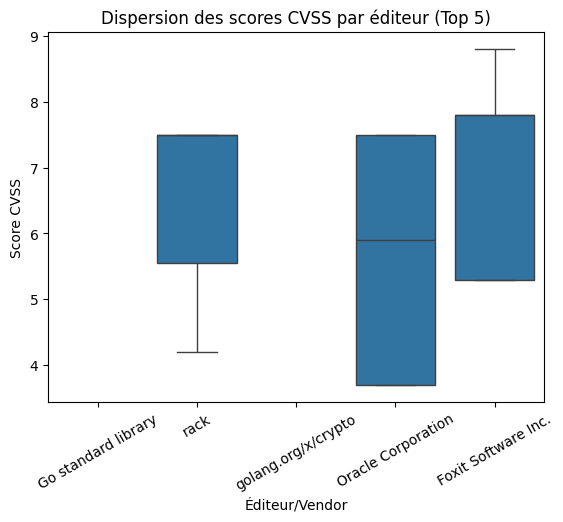

In [10]:
# -----------------------
# 7) Boxplot CVSS par éditeur (top 5)
# -----------------------

top5_vendors = df["Éditeur/Vendor"].value_counts().head(5).index
df_top5 = df[df["Éditeur/Vendor"].isin(top5_vendors)]

plt.figure()
sns.boxplot(x="Éditeur/Vendor", y="Score CVSS", data=df_top5)
plt.title("Dispersion des scores CVSS par éditeur (Top 5)")
plt.xticks(rotation=30)
plt.show()

In [11]:
# -----------------------
# 8) Vulnérabilités critiques (CVSS ≥ 9)
# -----------------------

critical = df[df["Score CVSS"] >= 9]

print("\nNombre de vulnérabilités CRITIQUES (CVSS ≥ 9) :", len(critical))
print(critical[[
    "Identifiant CVE",
    "Score CVSS",
    "Score EPSS",
    "Éditeur/Vendor",
    "Produit"
]].head(10))


Nombre de vulnérabilités CRITIQUES (CVSS ≥ 9) : 0
Empty DataFrame
Columns: [Identifiant CVE, Score CVSS, Score EPSS, Éditeur/Vendor, Produit]
Index: []
